# FF Coding [500]

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, InputLayer, Conv1D, ReLU, GlobalAveragePooling1D
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input

from keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [5]:
""" Load dataset from keras """
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
import pandas as pd

""" Number of classes """
print(pd.Series(np.concatenate([train_labels, test_labels])).nunique())

10


In [7]:
print(train_images.shape, '|', train_labels.shape)

(60000, 28, 28) | (60000,)


In [8]:
print(test_images.shape, '|', test_labels.shape)

(10000, 28, 28) | (10000,)


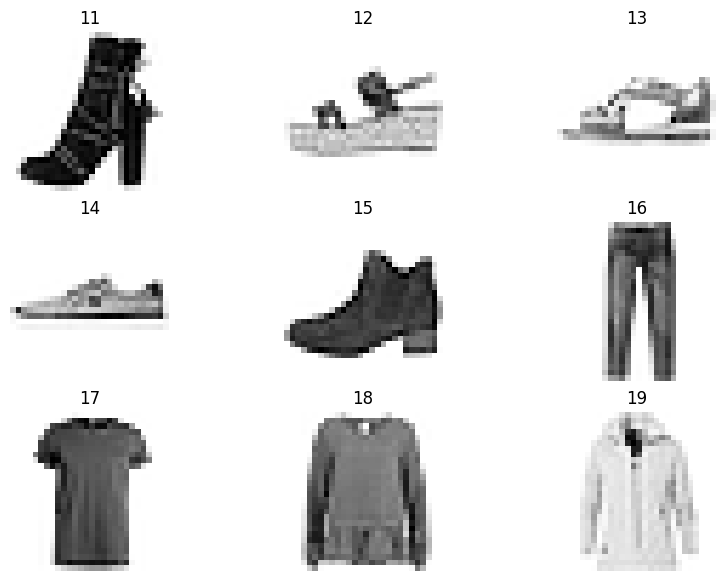

In [9]:
""" Display some samples """
fig = plt.figure(figsize=(10, 7))
for i in range(1, 10):
    fig.add_subplot(3, 3, i)

    plt.imshow(train_images[i+10], cmap='Greys')
    plt.axis('off')
    plt.title(f'{i+10}')


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
""" Split into training and validation data """
train_images, val_images, train_labels, val_lables = train_test_split(train_images, train_labels, test_size=0.2, random_state=123)
print(train_images.shape, '|', val_images.shape)

(48000, 28, 28) | (12000, 28, 28)


In [12]:
""" Reshape train, test, and validation data """
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
val_images = val_images.reshape(val_images.shape[0], 28, 28, 1)
print(train_images.shape, '|', test_images.shape, '|', val_images.shape)

(48000, 28, 28, 1) | (10000, 28, 28, 1) | (12000, 28, 28, 1)


In [13]:
""" Normalize dataset """
train_images = train_images / 255.0
test_images = test_images / 255.0
val_images = val_images / 255.0

In [14]:
!pip install pydot
!sudo apt install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [15]:
from tensorflow.keras.utils import plot_model

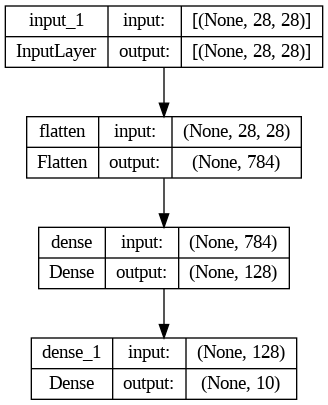

In [16]:
""" Define Dense Model """
model = keras.Sequential()
model.add(Input((28, 28)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

plot_model(model, show_shapes=True)

In [17]:
model.compile(
    optimizer ="rmsprop",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
  )

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

In [20]:
callbacks_list = [EarlyStopping(monitor="val_loss", patience=2),
                  ModelCheckpoint("mnist_model_checkpoint.keras", save_best_only=True),
                  TensorBoard(log_dir="/tensorboard_files")]

In [21]:
history = model.fit(
    x=train_images,
    y=train_labels,
    epochs=15,
    validation_data=(val_images, val_lables),
    callbacks=callbacks_list
  )

Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5324 - accuracy: 0.8115 - val_loss: 0.4268 - val_accuracy: 0.8538
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3943 - accuracy: 0.8587 - val_loss: 0.3832 - val_accuracy: 0.8669
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3559 - accuracy: 0.8732 - val_loss: 0.3705 - val_accuracy: 0.8704
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3328 - accuracy: 0.8796 - val_loss: 0.3445 - val_accuracy: 0.8746
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3184 - accuracy: 0.8863 - val_loss: 0.3648 - val_accuracy: 0.8738
Epoch 6/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3048 - accuracy: 0.8921 - val_loss: 0.3602 - val_accuracy: 0.8817


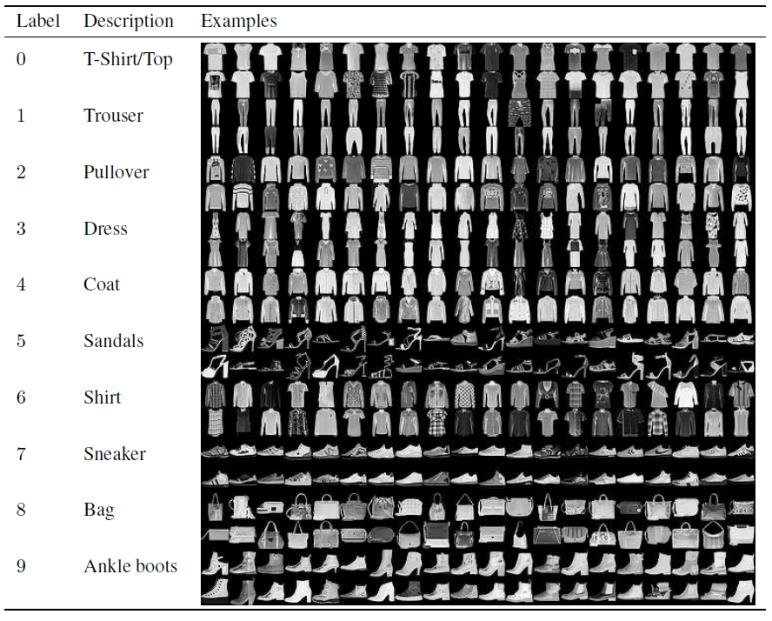

In [22]:
from IPython.display import Image
Image(filename='fashion_mnist_classes.png')

In [23]:
""" Classes Dictionary """
classes = {
    0: 'T-Shirt/Top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandals',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boots'
}

(28, 28)


Text(0.5, 1.0, 'class_number: 7 | class_name: sneaker')

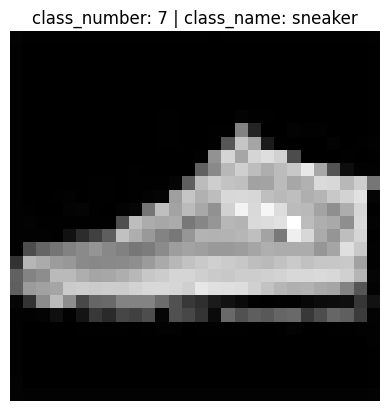

In [24]:
""" Load a test image for predict """
import cv2

test_img = cv2.imread('test.png')
test_img = cv2.cvtColor(cv2.resize(test_img, (28, 28)), cv2.COLOR_BGR2GRAY)

print(test_img.shape)
plt.imshow(test_img, 'gray')
plt.axis('off')
plt.title("class_number: 7 | class_name: sneaker")

In [25]:
""" Prediction step """
test_img = test_img.reshape(-1, 28, 28, 1)
predicted_class = np.argmax(model.predict(test_img), axis=1)
print('predicted_class_number:', predicted_class)
print('predicted_class_name:', f'[{classes.get(predicted_class[0])}]')

""" Test step """
print()
test_prediciton = np.argmax(model.predict(test_images), axis=1)
accuracy = np.sum(test_prediciton == test_labels)/len(test_labels)
print('accuracy:', accuracy)

# or

score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 79ms/step
predicted_class_number: [7]
predicted_class_name: [Sneaker]

313/313 [==============================] - 1s 1ms/step
accuracy: 0.8719
Test loss: 0.39831051230430603
Test accuracy: 0.8719000220298767


In [26]:
""" Frame History """
data = pd.DataFrame(history.history)
data.head()

,loss,accuracy,val_loss,val_accuracy
0,0.532405,0.811458,0.426827,0.853833
1,0.394299,0.858708,0.383215,0.866917
2,0.355914,0.873167,0.370462,0.870417
3,0.332752,0.879646,0.344530,0.874583
4,0.318448,0.886250,0.364808,0.873833


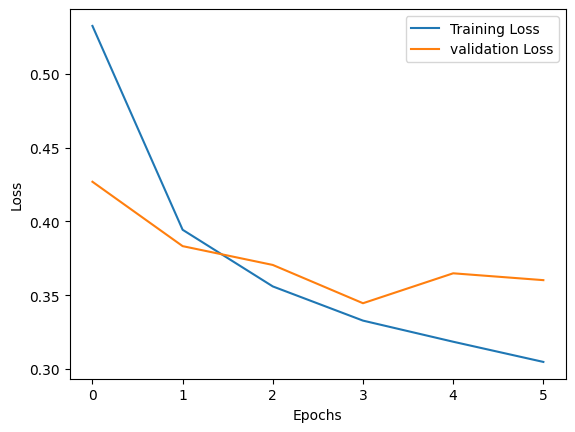

In [27]:
""" Loss plot """
plt.plot(range(data.shape[0]),data['loss'], label="Training Loss")
plt.plot(range(data.shape[0]),data['val_loss'],label="validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(test_labels, test_prediciton))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.99      0.96      0.97      1000
           2       0.80      0.78      0.79      1000
           3       0.84      0.91      0.87      1000
           4       0.81      0.75      0.78      1000
           5       0.98      0.91      0.95      1000
           6       0.68      0.68      0.68      1000
           7       0.93      0.96      0.94      1000
           8       0.98      0.95      0.97      1000
           9       0.93      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [29]:
print()
print(confusion_matrix(test_labels, test_prediciton))


[[859   1  13  33   1   0  86   0   7   0]
 [  7 958   0  26   5   0   3   0   1   0]
 [ 20   0 776  13  95   0  95   0   1   0]
 [ 32   4  11 910  17   0  26   0   0   0]
 [  0   1  95  57 749   0  96   0   2   0]
 [  0   0   0   2   0 910   0  37   3  48]
 [157   3  70  32  52   0 679   0   7   0]
 [  0   0   0   0   0  11   0 960   0  29]
 [  2   0   5   9   7   3  15   6 953   0]
 [  0   0   0   1   0   0   1  33   0 965]]


## THNAK YOU --- \\(^o^)/